In [4]:
import pandas as pd
from sklearn.cluster import KMeans

pd.options.display.float_format = '{:,.2f}'.format

scaled_df = pd.read_csv('scaled_data.csv')

In [5]:
scaled_df.head()

,customer_id,total_buy_cnt,total_price
0,12395,-0.05,-0.15
1,12427,-0.07,0.21
2,12431,0.23,0.95
3,12471,-1.13,-1.02
4,12472,-0.19,0.21


In [7]:
model = KMeans(n_clusters=4, random_state=123)
model.fit(scaled_df)

scaled_df['label'] = model.predict(scaled_df)
scaled_df['label'].value_counts()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


label
1    66
2    58
3    54
0    47
Name: count, dtype: int64

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

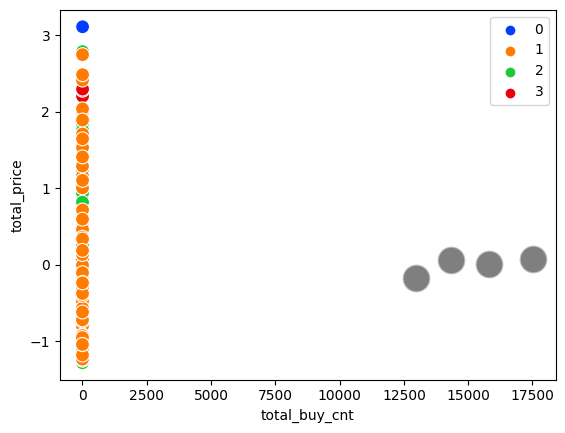

In [8]:
import seaborn as sns

centers = model.cluster_centers_

sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], hue=scaled_df['label'], s=100, palette='bright')
sns.scatterplot(x=centers[:,0], y=centers[:,1],alpha=0.5, color='black',s=400)
